In [34]:
import pandas as pd

file_path = "/Users/mariapleon/Desktop/Data Science/all_top_songs_ful (dataset).csv"

df = pd.read_csv(file_path, sep=None, engine='python', encoding='utf-8', on_bad_lines='skip')

print(df.shape)
df.head()

(1252, 10)


,track_id,track_name,track_popularity,duration_ms,artist_names,artist_ids,album_id,album_name,album_release_date,album_total_tracks
0,5ZaDUleherOLBbHk2PU1Kr,Another Day in Paradise - 2016 Remaster,54,323040,Phil Collins,4lxfqrEsLX6N1N4OCSkILp,1t89giOgPycfALwe2NuVf8,...But Seriously (2016 Remaster),1989-11-20,12
1,3RMeOetCdXttthQK0clPuz,How Am I Supposed to Live Without You,70,255666,Michael Bolton,6YHEMoNPbcheiWS2haGzkn,5g9LXOhTPW9Iow6GZPRg2D,Soul Provider,1989-06-27,10
2,7z38bideBRvGAgjXe2SECm,Opposites Attract,51,265373,Paula Abdul,4PpmBoqphQusNFsxuVKb6j,7zduRJgS6v79QmNUhKGozu,Forever Your Girl,1988-01-01,10
3,5HAv1Ckfe50DUjv8ghwTrz,Escapade,55,283933,Janet Jackson,4qwGe91Bz9K2T8jXTZ815W,4OD3LU6001esAtFshDX46M,Rhythm Nation 1814,1989-09-19,20
4,1KU5EHSz04JhGg3rReGJ0N,Black Velvet,73,287440,Alannah Myles,6IYnSXO40Bh7Zdqhf6rQoj,1Ghv7iViywM23K8BRFggQv,Alannah Myles,1989-00-00,10


In [35]:
df.columns.tolist()


['track_id',
 'track_name',
 'track_popularity',
 'duration_ms',
 'artist_names',
 'artist_ids',
 'album_id',
 'album_name',
 'album_release_date',
 'album_total_tracks']

In [36]:
COLS = {
    "track_id":           "track_id",
    "track_name":         "track_name",
    "artist_names":       "artist_names",
    "album_release_date": "album_release_date",
    "genre":              None,                 
    "track_popularity":   "track_popularity",
}
COLS



{'track_id': 'track_id',
 'track_name': 'track_name',
 'artist_names': 'artist_names',
 'album_release_date': 'album_release_date',
 'genre': None,
 'track_popularity': 'track_popularity'}

In [37]:
import pandas as pd
import re

df[COLS["album_release_date"]] = pd.to_datetime(
    df[COLS["album_release_date"]], errors="coerce", utc=True
)
df["release_year"] = df[COLS["album_release_date"]].dt.year

df[COLS["artist_names"]] = (
    df[COLS["artist_names"]]
      .astype(str)
      .str.replace(r"\s+", " ", regex=True)
      .str.strip()
      .str.title()
)



In [38]:
before = len(df)

df = df.drop_duplicates(subset=[COLS["track_id"]], keep="first")
after_id = len(df)

def normalize_title(name: str) -> str:
    s = str(name).lower()
    s = re.sub(r"[\(\[].*?[\)\]]", "", s)  
    s = re.sub(r"\s*-\s*(remaster(ed)?(\s*\d{2,4})?|radio edit|live|mono|stereo|single version)\b","", s)
    s = re.sub(r"\s*(feat\.|featuring)\s+.+$", "", s)       
    return re.sub(r"\s+"," ", s).strip()


df["_tnorm"] = df[COLS["track_name"]].astype(str).apply(normalize_title)
df["_main_artist"] = df[COLS["artist_names"]].astype(str).str.split(r"[,&]").str[0].str.strip().str.title()
df["_dedupe_key"] = df["_main_artist"].str.lower() + " | " + df["_tnorm"]

sort_order = [(COLS["track_popularity"], False), (COLS["album_release_date"], True)]
for col, asc in reversed(sort_order):
    df = df.sort_values(by=col, ascending=asc)

df = df.drop_duplicates(subset=["_dedupe_key"], keep="first")
df = df.drop(columns=["_tnorm","_main_artist","_dedupe_key"])

after_b = len(df)

print(f"Removed by track_id: {before - after_id}")
print(f"Removed by title+artist: {after_id - after_b}")
print("New shape:", df.shape)


Removed by track_id: 10
Removed by title+artist: 3
New shape: (1239, 11)


In [39]:
print(df.isna().sum().sort_values(ascending=False).head(10))
df.sample(3, random_state=7)


album_release_date    153
release_year          153
track_id                0
track_name              0
track_popularity        0
duration_ms             0
artist_names            0
artist_ids              0
album_id                0
album_name              0
dtype: int64


,track_id,track_name,track_popularity,duration_ms,artist_names,artist_ids,album_id,album_name,album_release_date,album_total_tracks,release_year
134,1Oi2zpmL81Q0yScF1zxaC0,"Bills, Bills, Bills",70,256026,Destiny'S Child,1Y8cdNmUJH7yBTd9yOvr5i,283NWqNsCA9GwVHrJk59CG,The Writing's On The Wall,1999-07-27 00:00:00+00:00,16,1999.0
315,5MnPcgXz4RXqx09nIqvHKX,Hello,74,155006,Cardi B,4kYSro6naA4h99UJvo89HB,1LsNb6mVitbLZCxnRsbCDJ,AM I THE DRAMA?,2025-09-19 00:00:00+00:00,23,2025.0
178,2tpWsVSb9UEmDRxAl1zhX1,Counting Stars,87,257265,Onerepublic,5Pwc4xIPtQLFEnJriah9YJ,20lOt6G8MHv8ZO7ViOmiP7,Native,2013-01-01 00:00:00+00:00,12,2013.0


In [40]:
out_path = "/Users/mariapleon/Desktop/Data Science/cleaned_top_songs.csv"
df.to_csv(out_path, index=False, encoding="utf-8")
print("Saved:", out_path)


Saved: /Users/mariapleon/Desktop/Data Science/cleaned_top_songs.csv


In [41]:
cols_order = [
    "track_id", "track_name", "artist_names",
    "album_id", "album_name", "album_release_date", "release_year",
    "artist_ids", "duration_ms", "album_total_tracks", "track_popularity"
]
df = df[[c for c in cols_order if c in df.columns]]
df.head(3)


,track_id,track_name,artist_names,album_id,album_name,album_release_date,release_year,artist_ids,duration_ms,album_total_tracks,track_popularity
240,1CPZ5BxNNd0n0nF4Orb9JS,Golden,Huntr/X; Ejae; Audrey Nuna; Rei Ami; Kpop Demo...,14JkAa6IiFaOh5s0nMyMU9,KPop Demon Hunters (Soundtrack from the Netfli...,2025-06-20 00:00:00+00:00,2025.0,2yNNYQBChuox9A5Ka93BIn; 0RMJOzHDhAKY1o2j0W0vxY...,194607,12,100
246,02sy7FAs8dkDNYsHp4Ul3f,Soda Pop,Saja Boys; Andrew Choi; Neckwav; Danny Chung; ...,14JkAa6IiFaOh5s0nMyMU9,KPop Demon Hunters (Soundtrack from the Netfli...,2025-06-20 00:00:00+00:00,2025.0,0BJ2EjOqcfgFvlZXNKrNbE; 7JBaynR7JFeniONqbnn1U4...,150686,12,95
249,1I37Zz2g3hk9eWxaNkj031,Your Idol,Saja Boys; Andrew Choi; Neckwav; Danny Chung; ...,14JkAa6IiFaOh5s0nMyMU9,KPop Demon Hunters (Soundtrack from the Netfli...,2025-06-20 00:00:00+00:00,2025.0,0BJ2EjOqcfgFvlZXNKrNbE; 7JBaynR7JFeniONqbnn1U4...,191537,12,95


In [42]:
df.isna().sum().sort_values(ascending=False)


album_release_date    153
release_year          153
track_id                0
track_name              0
artist_names            0
album_id                0
album_name              0
artist_ids              0
duration_ms             0
album_total_tracks      0
track_popularity        0
dtype: int64

In [43]:
df['album_release_date'] = df['album_release_date'].fillna('N/A')
df['release_year'] = df['release_year'].fillna('N/A')


In [44]:
df[['album_release_date', 'release_year']].head(10)
print(df.isna().sum().sort_values(ascending=False).head(10))


track_id              0
track_name            0
artist_names          0
album_id              0
album_name            0
album_release_date    0
release_year          0
artist_ids            0
duration_ms           0
album_total_tracks    0
dtype: int64


In [45]:
out_path = "/Users/mariapleon/Desktop/Data Science/cleaned_top_songs.csv"
df.to_csv(out_path, index=False, encoding="utf-8")
print("Saved:", out_path)


Saved: /Users/mariapleon/Desktop/Data Science/cleaned_top_songs.csv


In [46]:
import pandas as pd

file_path = "/Users/mariapleon/Desktop/Data Science/cleaned_final_dataset.csv"
df = pd.read_csv(file_path, sep=None, engine='python', encoding='utf-8', on_bad_lines='skip')

print(df.shape)
df.head()

(1239, 13)


,track_id,track_name,artist_names,album_id,album_name,album_release_date,release_year,artist_ids,duration_ms,album_total_tracks,track_popularity,genre,gender
0,1CPZ5BxNNd0n0nF4Orb9JS,golden,huntr/x; ejae; audrey nuna; rei ami; kpop demo...,14JkAa6IiFaOh5s0nMyMU9,kpop demon hunters (soundtrack from the netfli...,2025-06-20 00:00:00+00:00,2025,2yNNYQBChuox9A5Ka93BIn; 0RMJOzHDhAKY1o2j0W0vxY...,194607,12,100,k-pop,group
1,02sy7FAs8dkDNYsHp4Ul3f,soda pop,saja boys; andrew choi; neckwav; danny chung; ...,14JkAa6IiFaOh5s0nMyMU9,kpop demon hunters (soundtrack from the netfli...,2025-06-20 00:00:00+00:00,2025,0BJ2EjOqcfgFvlZXNKrNbE; 7JBaynR7JFeniONqbnn1U4...,150686,12,95,k-pop,group
2,1I37Zz2g3hk9eWxaNkj031,your idol,saja boys; andrew choi; neckwav; danny chung; ...,14JkAa6IiFaOh5s0nMyMU9,kpop demon hunters (soundtrack from the netfli...,2025-06-20 00:00:00+00:00,2025,0BJ2EjOqcfgFvlZXNKrNbE; 7JBaynR7JFeniONqbnn1U4...,191537,12,95,k-pop,group
3,1qbmS6ep2hbBRaEZFpn7BX,man i need,olivia dean,0Bv6OJO0L5gcf20DMww54a,man i need,2025-08-15 00:00:00+00:00,2025,00x1fYSGhdqScXBRpSj3DW,184000,3,95,pop soul,female
4,3RXUgPNIbUgFxsDWuBQEt6,how it’s done,huntr/x; ejae; audrey nuna; rei ami; kpop demo...,14JkAa6IiFaOh5s0nMyMU9,kpop demon hunters (soundtrack from the netfli...,2025-06-20 00:00:00+00:00,2025,2yNNYQBChuox9A5Ka93BIn; 0RMJOzHDhAKY1o2j0W0vxY...,176059,12,94,k-pop,group


In [47]:
df.columns

Index(['track_id', 'track_name', 'artist_names', 'album_id', 'album_name',
       'album_release_date', 'release_year', 'artist_ids', 'duration_ms',
       'album_total_tracks', 'track_popularity', 'genre', 'gender'],
      dtype='object')

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
sns.set_theme(
    style="whitegrid",
    context="notebook",
    palette="colorblind",
    font_scale=1.1
)

df = pd.read_csv("cleaned_final_dataset.csv", sep=";", engine="python")

print(df.shape)
print(df.columns)

if "decade" not in df.columns:
    df["decade"] = (df["release_year"] // 10) * 10
    
df_filtered = df[df["gender"].isin(["male", "female", "non-binary"])]

df.head()


(1239, 13)
Index(['track_id', 'track_name', 'artist_names', 'album_id', 'album_name',
       'album_release_date', 'release_year', 'artist_ids', 'duration_ms',
       'album_total_tracks', 'track_popularity', 'genre', 'gender'],
      dtype='object')


,track_id,track_name,artist_names,album_id,album_name,album_release_date,release_year,artist_ids,duration_ms,album_total_tracks,track_popularity,genre,gender,decade
0,1CPZ5BxNNd0n0nF4Orb9JS,golden,huntr/x; ejae; audrey nuna; rei ami; kpop demo...,14JkAa6IiFaOh5s0nMyMU9,kpop demon hunters (soundtrack from the netfli...,2025-06-20 00:00:00+00:00,2025,2yNNYQBChuox9A5Ka93BIn; 0RMJOzHDhAKY1o2j0W0vxY...,194607,12,100,k-pop,group,2020
1,02sy7FAs8dkDNYsHp4Ul3f,soda pop,saja boys; andrew choi; neckwav; danny chung; ...,14JkAa6IiFaOh5s0nMyMU9,kpop demon hunters (soundtrack from the netfli...,2025-06-20 00:00:00+00:00,2025,0BJ2EjOqcfgFvlZXNKrNbE; 7JBaynR7JFeniONqbnn1U4...,150686,12,95,k-pop,group,2020
2,1I37Zz2g3hk9eWxaNkj031,your idol,saja boys; andrew choi; neckwav; danny chung; ...,14JkAa6IiFaOh5s0nMyMU9,kpop demon hunters (soundtrack from the netfli...,2025-06-20 00:00:00+00:00,2025,0BJ2EjOqcfgFvlZXNKrNbE; 7JBaynR7JFeniONqbnn1U4...,191537,12,95,k-pop,group,2020
3,1qbmS6ep2hbBRaEZFpn7BX,man i need,olivia dean,0Bv6OJO0L5gcf20DMww54a,man i need,2025-08-15 00:00:00+00:00,2025,00x1fYSGhdqScXBRpSj3DW,184000,3,95,pop soul,female,2020
4,3RXUgPNIbUgFxsDWuBQEt6,how it’s done,huntr/x; ejae; audrey nuna; rei ami; kpop demo...,14JkAa6IiFaOh5s0nMyMU9,kpop demon hunters (soundtrack from the netfli...,2025-06-20 00:00:00+00:00,2025,2yNNYQBChuox9A5Ka93BIn; 0RMJOzHDhAKY1o2j0W0vxY...,176059,12,94,k-pop,group,2020


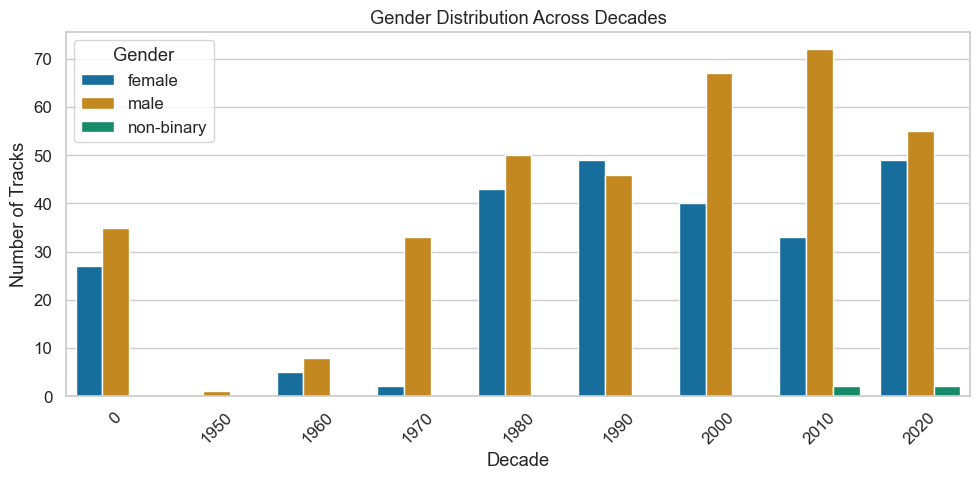

In [55]:
#2. Bivariate Analysis
# Keep only usable gender categories
df_decade_gender = df[df["gender"].isin(["male", "female", "non-binary"])]

plt.figure(figsize=(10, 5))
sns.countplot(
    data=df_decade_gender,
    x="decade",
    hue="gender",
    palette="colorblind"
)

plt.title("Gender Distribution Across Decades")
plt.xlabel("Decade")
plt.ylabel("Number of Tracks")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


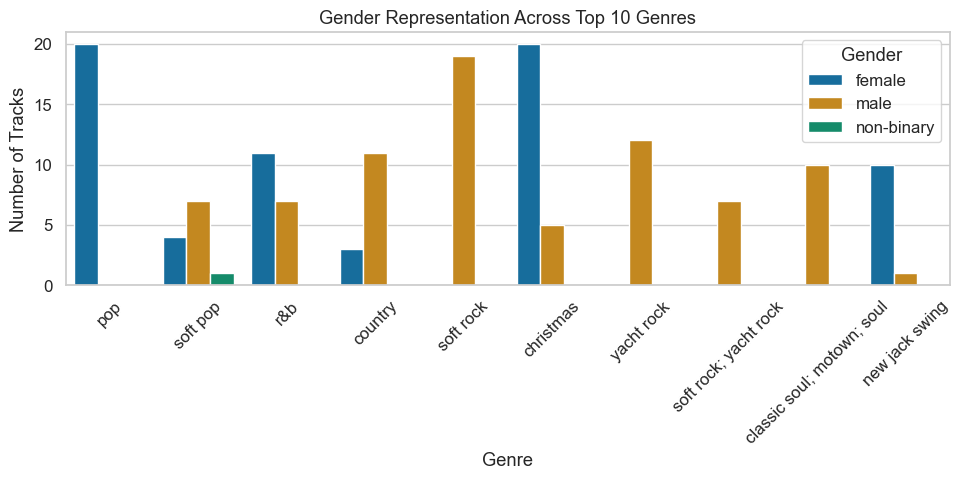

In [50]:
# Filter only real genders
df_gender = df[df["gender"].isin(["male", "female", "non-binary"])]

df_gender = df_gender[df_gender["genre"] != "unknown"]

top_genres = df_gender["genre"].value_counts().head(10).index

df_top = df_gender[df_gender["genre"].isin(top_genres)]

plt.figure(figsize=(10, 5))
sns.countplot(data=df_top, x="genre", hue="gender", palette="colorblind")
plt.title("Gender Representation Across Top 10 Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Tracks")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()



/var/folders/dc/gdybwnrd1fjdfg9ft6t8949m0000gn/T/ipykernel_37442/2508067728.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_gender, x="gender", y="track_popularity", palette="colorblind")


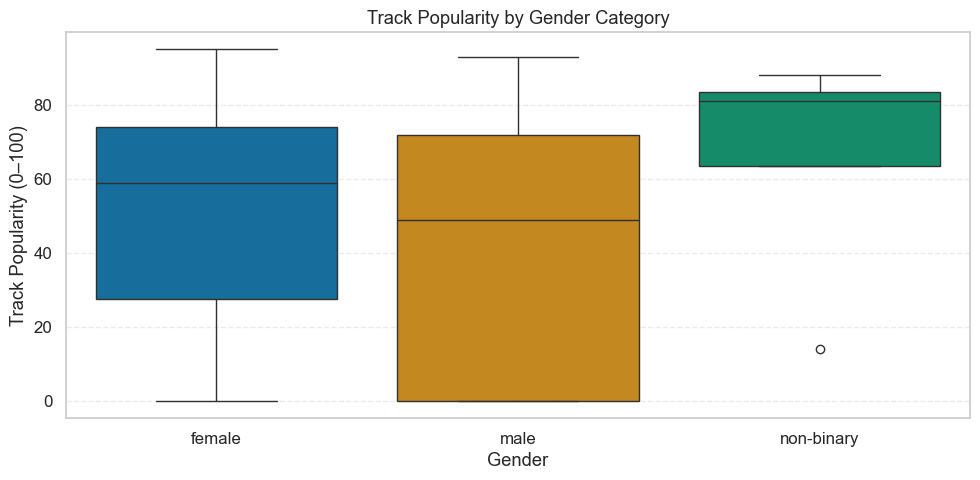

In [51]:

df_gender = df[df["gender"].isin(["male", "female", "non-binary"])]

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_gender, x="gender", y="track_popularity", palette="colorblind")
plt.title("Track Popularity by Gender Category")
plt.xlabel("Gender")
plt.ylabel("Track Popularity (0–100)")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



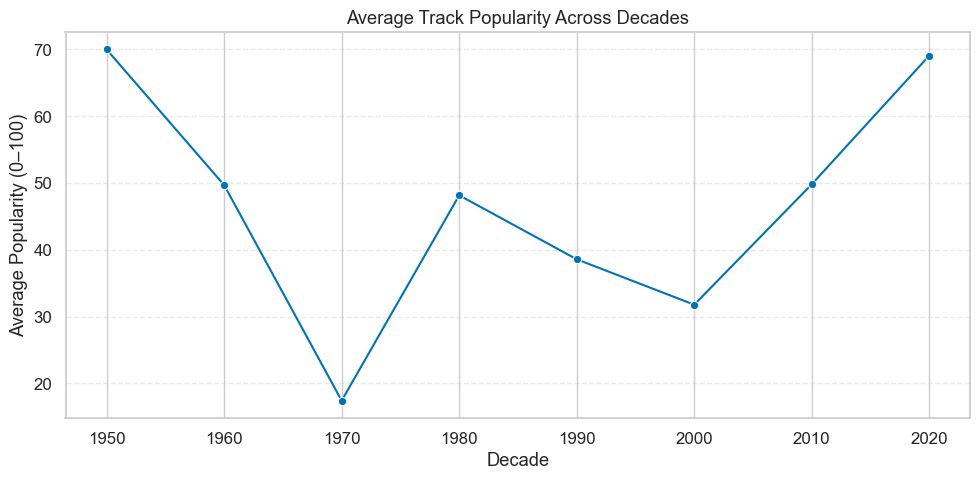

In [52]:
# Remove unknown genders and invalid years
df_clean = df[(df["gender"].isin(["male", "female", "non-binary"])) &
              (df["release_year"] >= 1900)]

if "decade" not in df_clean.columns:
    df_clean["decade"] = (df_clean["release_year"] // 10) * 10

decade_popularity = df_clean.groupby("decade")["track_popularity"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=decade_popularity, x="decade", y="track_popularity", marker="o")
plt.title("Average Track Popularity Across Decades")
plt.xlabel("Decade")
plt.ylabel("Average Popularity (0–100)")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


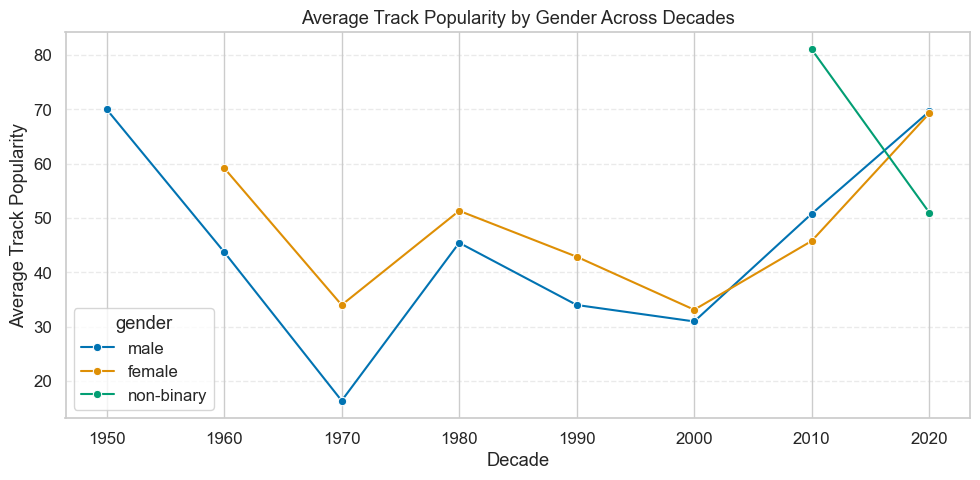

In [56]:
# Filter to valid gender categories and valid years
df_clean = df[(df["gender"].isin(["male", "female", "non-binary"])) &
              (df["release_year"] >= 1900)]

if "decade" not in df_clean.columns:
    df_clean["decade"] = (df_clean["release_year"] // 10) * 10

gender_decade_pop = (
    df_clean.groupby(["decade", "gender"])["track_popularity"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=gender_decade_pop,
    x="decade",
    y="track_popularity",
    hue="gender",
    marker="o",
    palette="colorblind"
)

plt.title("Average Track Popularity by Gender Across Decades")
plt.xlabel("Decade")
plt.ylabel("Average Track Popularity")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()
